# TechnoHacks Edutech Internship Task3

# Task : Fraud Transaction Detection

# About the Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Link for the Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# About the features

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

1. The features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

2. The feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

3. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

4. The feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Importing Libraries

In [54]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Importing Dataset

In [56]:
# Loading the dataset
fraud_df = pd.read_csv('creditcard.csv')

fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Exploration

In [57]:
# showing the first 5 rows
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
# showing the last 5 rows
fraud_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [59]:
# showing dimension of the dataset
nRow, nCol = fraud_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [60]:
# checking the column names
fraud_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [61]:
# checking the datatypes
fraud_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [62]:
# showing information about the dataset
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Observation:

1. All the columns are numerical.
2. From column 'V20' to 'Class' we have only one null value.
3. There are 263383 rows and 31 columns in the dataset.

# Data Cleaning and Data Preprocessing

## Handling duplicates

In [63]:
# checking for duplicate values
fraud_df.duplicated().sum()

1081

In [64]:
# Removing duplicated values
fraud_df.drop_duplicates(inplace=True)

# Checking foe duplicate values
print(fraud_df.duplicated().any())

# checking for the dimension of the dataset after removing duplicates
fraud_df.shape

False


(283726, 31)

## Handling Null Values

In [65]:
# checking for null values
fraud_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 We can see that some of the columns are having null values, which is very less in terms of values (only 1) so we will drop the null values.

In [66]:
# Dropping the null values
fraud_df.dropna(inplace=True)

# checking for null values
fraud_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Outliers Detection

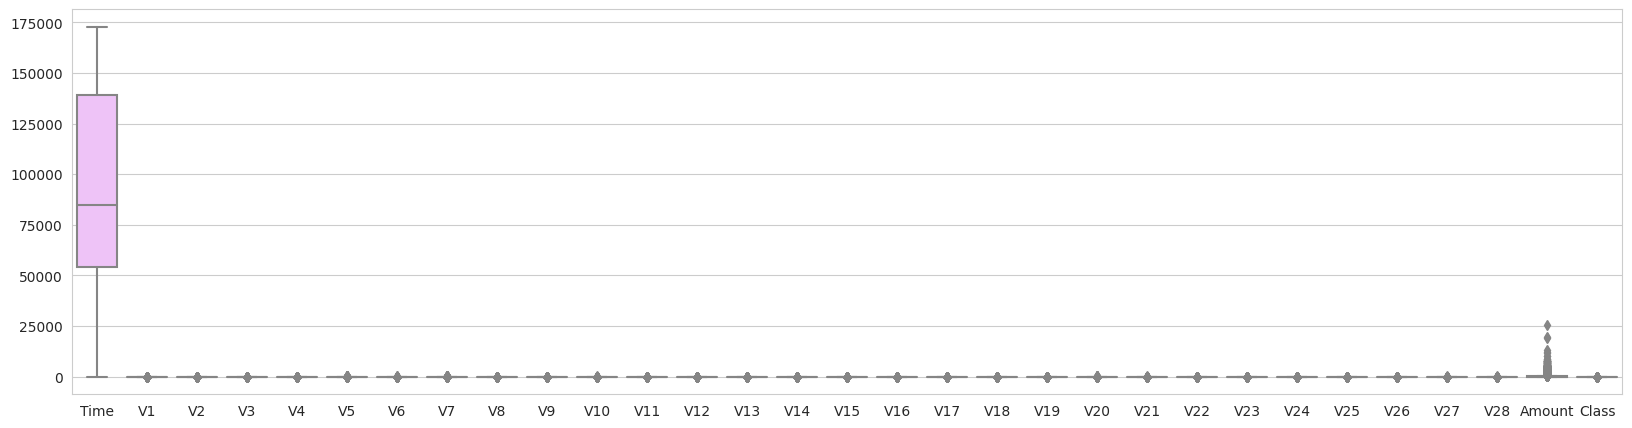

In [67]:
# checking for outliers
plt.figure(figsize=(20,5))
sns.boxplot(data=fraud_df,color='#f4bbff')
plt.show()

We can see that there are no such outliers in the dataset.

## Descriptive Statistical Analysis

In [68]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


# Data Visualization

## Plotting Histogram


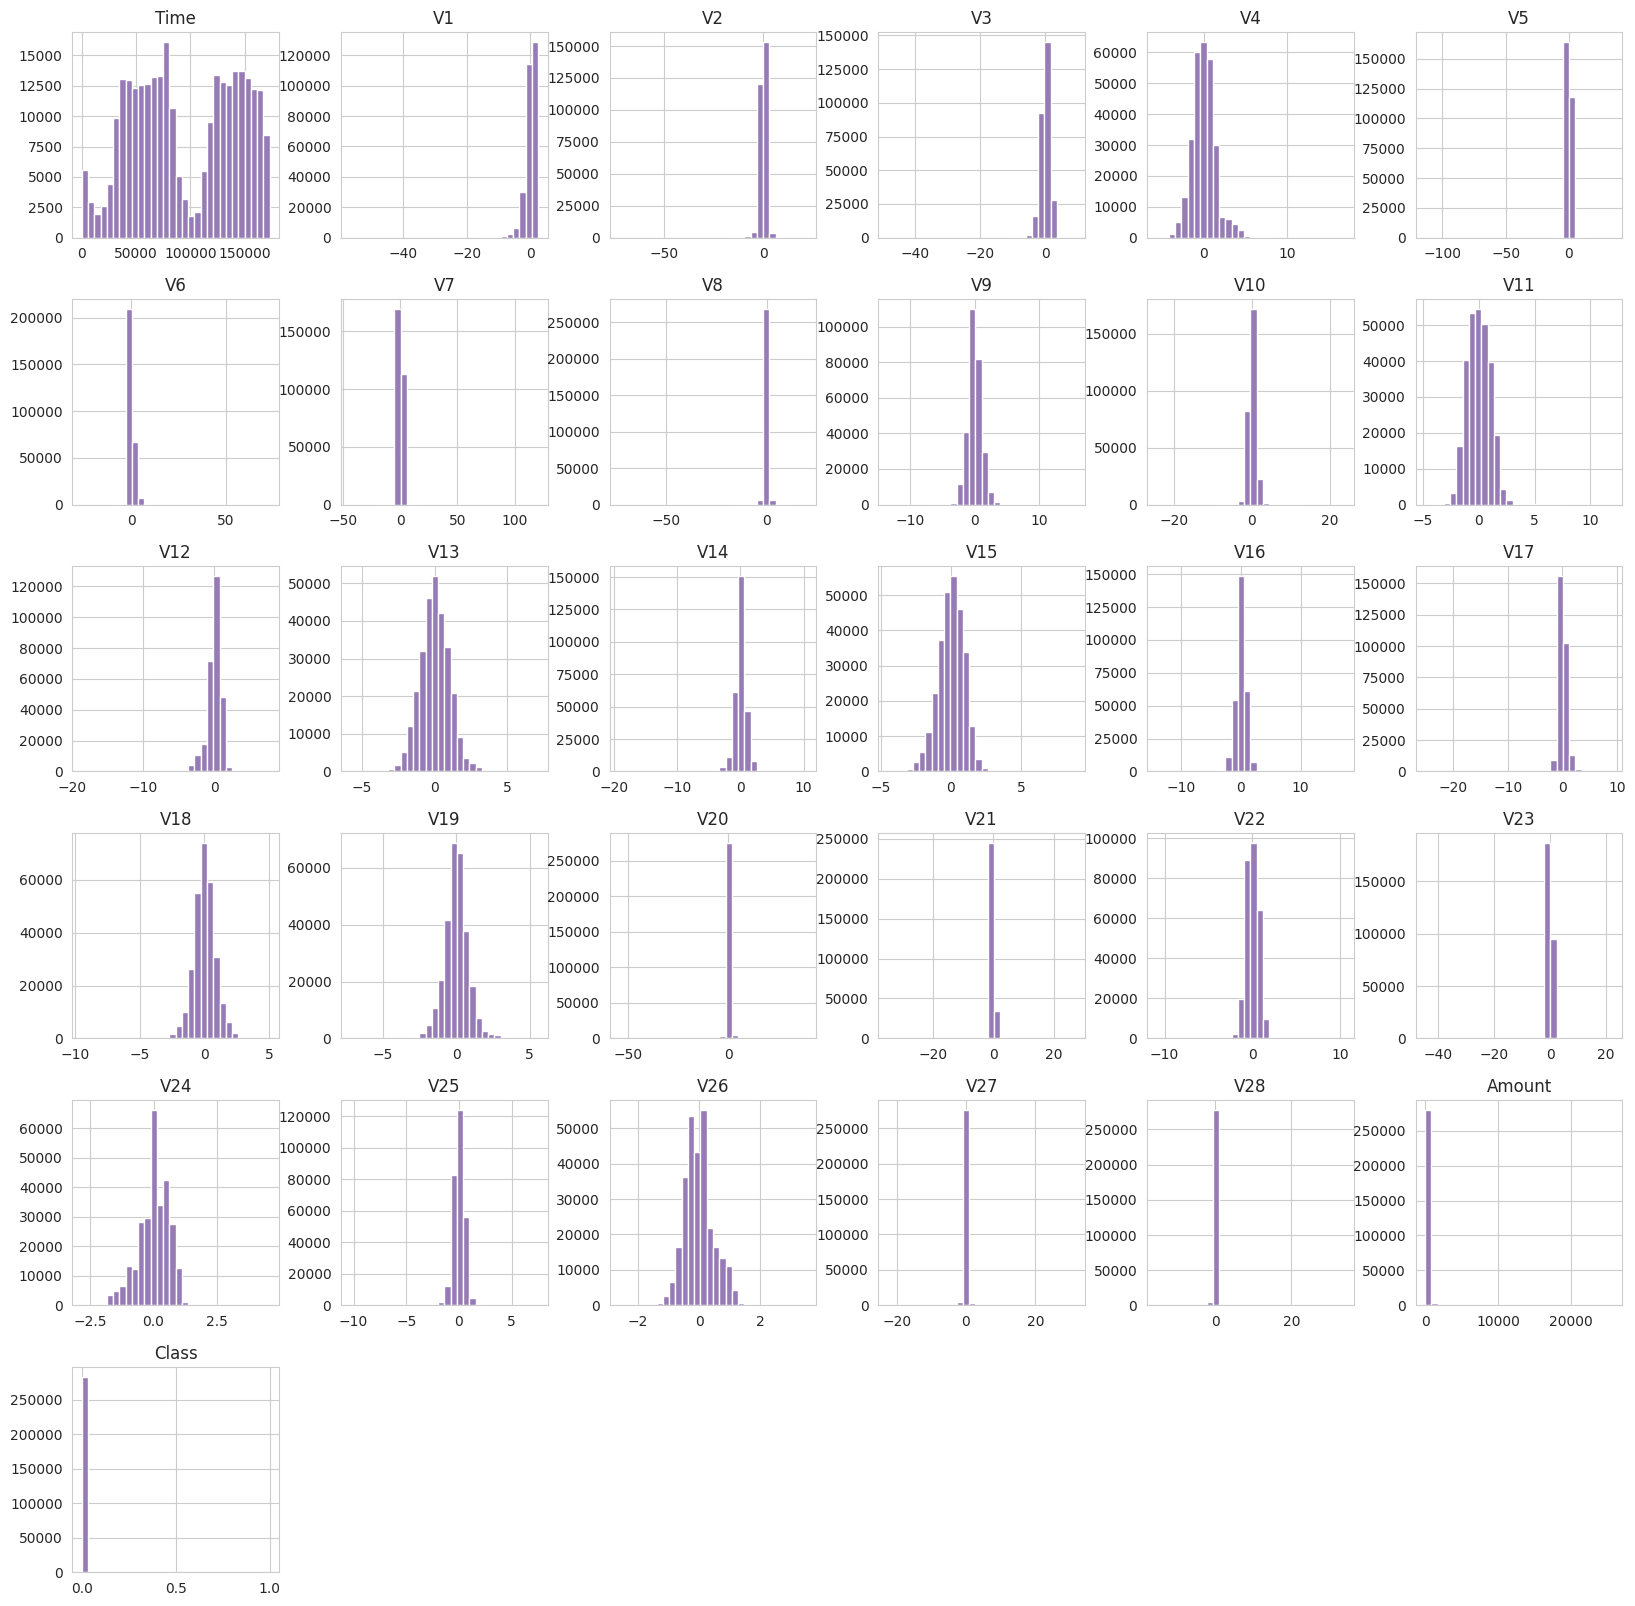

In [69]:
# Plotting histplot for the features
fraud_df.hist(figsize=(20,20),bins=30,color='#967bb6')
plt.show()

## Density plot for Time and Amount Column

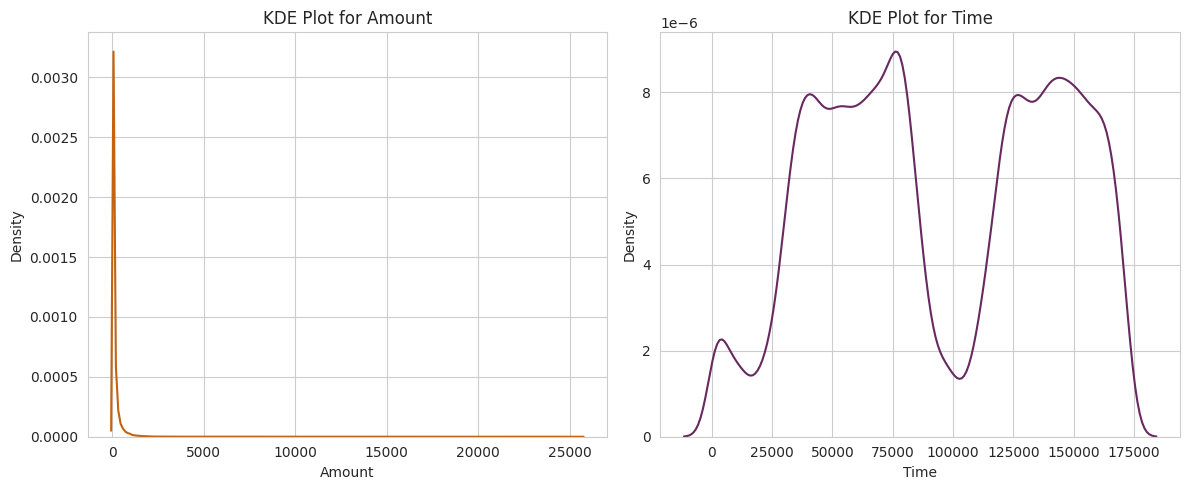

In [70]:
# Create a Density Plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the KDE plot for 'Amount' on the first subplot (ax1)
sns.kdeplot(data=fraud_df, x='Amount', ax=ax1, color='#c46210')
ax1.set_title('KDE Plot for Amount')

# Plot the KDE plot for 'Time' on the second subplot (ax2)
sns.kdeplot(data=fraud_df, x='Time', ax=ax2, color='#682860')
ax2.set_title('KDE Plot for Time')

# Display the plots
plt.tight_layout()
plt.show()

## Density plot for Amount and Time on the basis of class

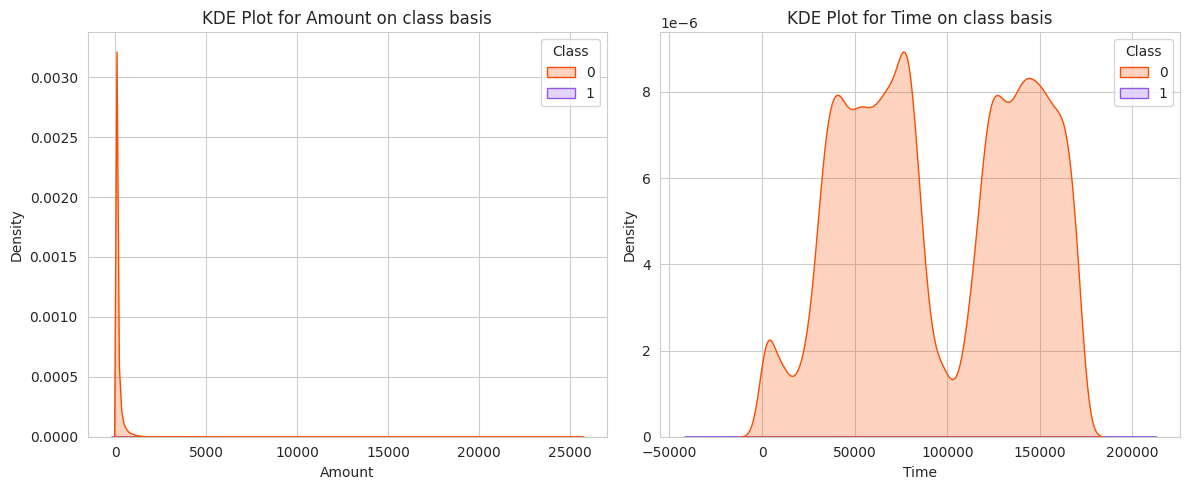

In [71]:
# Create a Density Plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
class_colors = {0: '#f94d00', 1: '#9457eb'}

# Plot the KDE plot for 'Amount' on the first subplot (ax1)
sns.kdeplot(data=fraud_df, x='Amount',hue='Class',fill=True, ax=ax1, palette=class_colors)
ax1.set_title('KDE Plot for Amount on class basis')

# Plot the KDE plot for 'Time' on the second subplot (ax2)
sns.kdeplot(data=fraud_df, x='Time',hue='Class',fill=True, ax=ax2, palette=class_colors)
ax2.set_title('KDE Plot for Time on class basis')

# Display the plots
plt.tight_layout()
plt.show()

## Correlation Plot

In [72]:
# showing relationship between the features
fraud_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


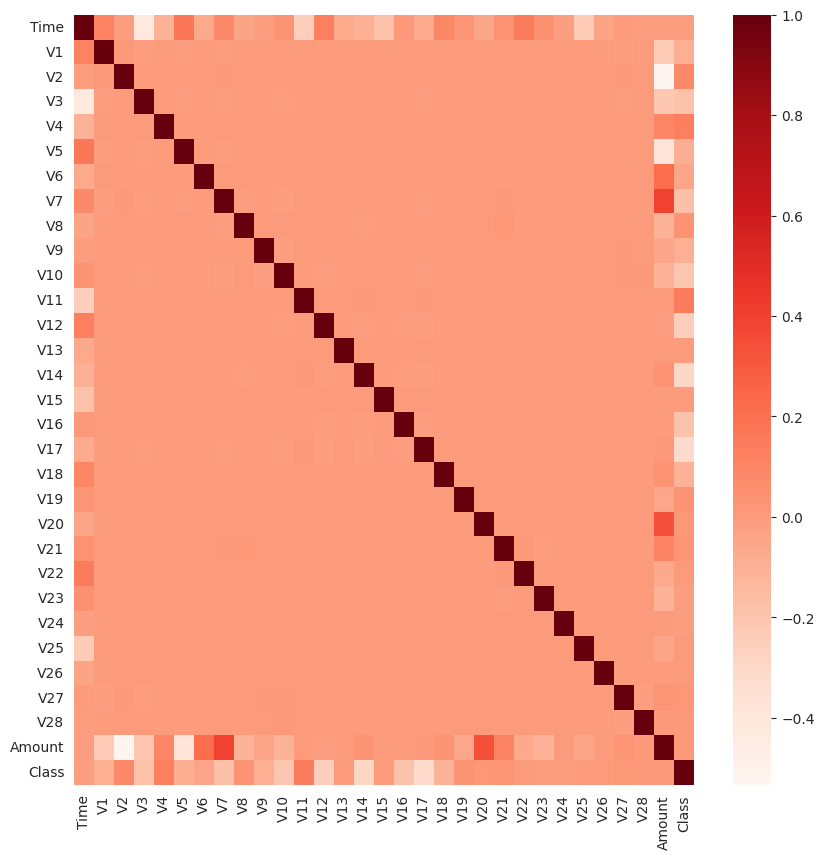

In [73]:
# plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(fraud_df.corr(), cmap='Reds')
plt.show()

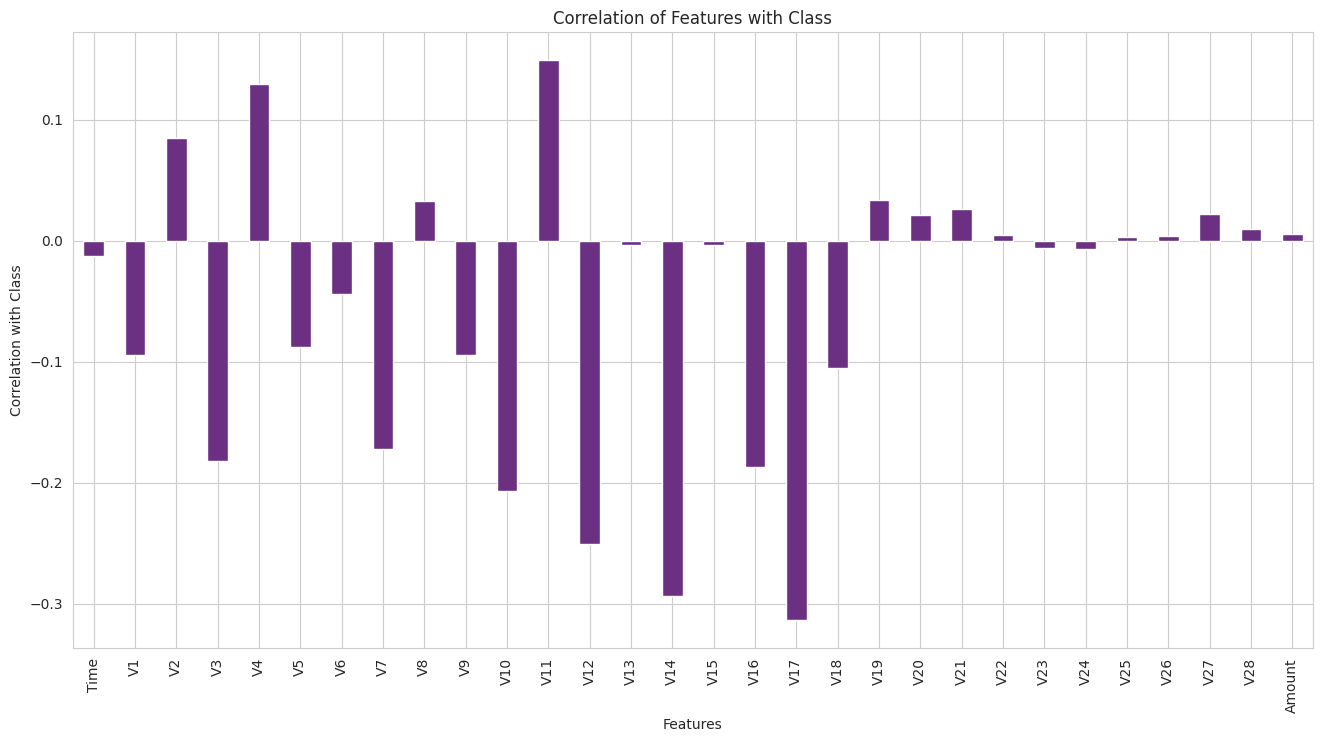

In [74]:
# Correlation Diagram on the basis of class

# Drop the 'Class' column from the original dataset and create a new DataFrame 'fraud_df1'
fraud_df1 = fraud_df.drop(columns=['Class'])

# Calculate the correlation between each column in 'dataset_2' and the 'Class' column in the original dataset
correlation_with_class = fraud_df1.corrwith(fraud_df['Class'])

# Create a bar plot to visualize the correlation values with the 'Class' column
# Set the size of the figure to 16 inches (width) by 8 inches (height)
# Show grid lines in the plot for better readability
correlation_with_class.plot.bar(figsize=(16, 8),grid=True, color='#6c3082')

# Set appropriate labels and titles for the plot
plt.xlabel("Features")  # Label for the x-axis (features)
plt.ylabel("Correlation with Class")  # Label for the y-axis (correlation values)
plt.title("Correlation of Features with Class")  # Set the title for the bar plot

# Show the plot
plt.show()

# Target Variable

In [75]:
# Counting the fraud and non-fraud transactions
fraud_df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

## Plotting Barplot

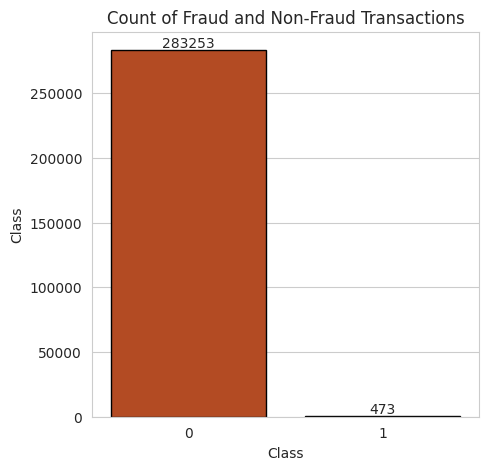

In [76]:
plt.figure(figsize=(5,5))
class_colors = {0: '#cb410b', 1: '#dcd0ff'}
ax = sns.barplot(x=fraud_df['Class'].value_counts().index, y=fraud_df['Class'].value_counts(),palette=[class_colors[0], class_colors[1]],edgecolor='black')
bar = ax.bar_label(ax.containers[0])
ax.set_title('Count of Fraud and Non-Fraud Transactions')
plt.xlabel('Class')
plt.show()

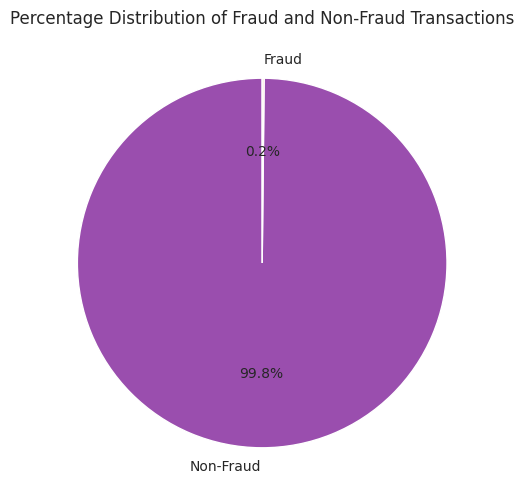

In [77]:
plt.figure(figsize=(6, 6))
class_colors = {0: '#9a4eae', 1: '#ffddca'}

# Calculate the value counts for the 'Class' column
class_counts = fraud_df['Class'].value_counts()

# Calculate percentage distribution
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
non_fraud_percentage = (class_counts[0] / class_counts.sum()) * 100
percentages = [non_fraud_percentage, fraud_percentage]
class_labels = ['Non-Fraud', 'Fraud']

# Create the pie plot
plt.pie(percentages, labels=class_labels, colors=[class_colors[0], class_colors[1]], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Fraud and Non-Fraud Transactions')
plt.show()


# Data Modelling

In [78]:
# importing libraries

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Selecting the Dependent and Independent Features

In [79]:
x = fraud_df.drop('Class',axis=1)  # dataframe
y = fraud_df['Class']        # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(283726, 30) (283726,)


In [80]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


# Train Test Split

## Dividing the data into training and testing data

In [81]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 30)
(56746, 30)
(226980,)
(56746,)


# Scaling the Data

In [82]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [83]:
print(x_train)

[[-1.97579025 -1.52486886 -2.60108307 ... -1.52001278  0.46879698
   6.81964163]
 [ 1.27199144  0.98194815 -0.44103132 ... -0.13685051 -0.16174492
  -0.07543947]
 [-1.06420612 -1.50511869  1.67460693 ...  0.69876314  0.41873435
  -0.30310959]
 ...
 [-0.37954933 -1.20916685 -1.03264268 ... -0.02515349 -0.81984975
   0.31359872]
 [ 0.05790071  1.03624832 -0.14261393 ... -0.14804931 -0.25911008
  -0.35149104]
 [-0.41572798  0.40330346 -0.60772486 ...  0.01825999  0.01229452
   0.07371942]]


In [84]:
print(x_test)

[[ 1.41948579  1.00594528 -0.22624027 ...  0.0423535  -0.1114411
  -0.36026509]
 [-1.20729922  0.79900737 -0.74727347 ...  0.07641526  0.0473625
  -0.28237468]
 [-1.00286246  0.68967166 -0.97837596 ...  0.15106771  0.1335199
  -0.00177054]
 ...
 [ 1.6193739  -0.41809073  0.08688371 ... -0.02304961  0.19035967
  -0.22050105]
 [-1.5883333  -0.11755057  0.32911541 ...  0.35468147  0.17505552
  -0.17381647]
 [ 1.14494498  1.02595229  0.07660375 ... -0.10858923 -0.05942652
  -0.33779193]]


# Creating Functions to compute Confusion Matrix, Classification Report and Accuracy score (Training and Testing score)

In [85]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing Accuracy

## Logistic Regression

In [86]:
# Building the logistic Regression Model
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Computing Training and Testing score
mscore(lr)

# Generating Prediction
ypred_lr = lr.predict(x_test)
print(ypred_lr)

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Training Score 0.9992334126354745
Testing Score 0.9991365030134283
[0 0 0 ... 0 0 0]
Confusion Matrix
 [[56649    10]
 [   39    48]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.83      0.55      0.66        87

    accuracy                           1.00     56746
   macro avg       0.91      0.78      0.83     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score 0.9991365030134283


## Random Forest Classifier

In [87]:
# Building the RandomForest Classifier Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

# Computing Training and Testing score
mscore(rf)

# Generating Prediction
ypred_rf = rf.predict(x_test)
print(ypred_rf)

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rf)
acc_rf = accuracy_score(y_test,ypred_rf)
print('Accuracy Score',acc_rf)

Training Score 1.0
Testing Score 0.9995946850879357
[0 0 0 ... 0 0 0]
Confusion Matrix
 [[56655     4]
 [   19    68]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.94      0.78      0.86        87

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score 0.9995946850879357


## Decision Tree Classifier

In [88]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train, y_train)

# Computing Training and Testing score
mscore(dt)

# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Training Score 1.0
Testing Score 0.9992422373383146
[0 0 0 ... 0 0 0]
Confusion Matrix
 [[56635    24]
 [   19    68]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.74      0.78      0.76        87

    accuracy                           1.00     56746
   macro avg       0.87      0.89      0.88     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score 0.9992422373383146


## XGBoost Classifier

In [89]:
# Building the XGBoost Classifier Model
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# Computing Training and Testing score
mscore(xgb)

# Generating Prediction
ypred_xgb = xgb.predict(x_test)
print(ypred_xgb)

# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_xgb)
acc_xgb = accuracy_score(y_test,ypred_xgb)
print('Accuracy Score',acc_xgb)

Training Score 1.0
Testing Score 0.9995770627004547
[0 0 0 ... 0 0 0]
Confusion Matrix
 [[56653     6]
 [   18    69]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.92      0.79      0.85        87

    accuracy                           1.00     56746
   macro avg       0.96      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score 0.9995770627004547


# Model Performance

In [90]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','XGBoost Classifier'],
    'Score': [acc_lr,acc_rf,acc_dt,acc_xgb]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,0.999595
3,XGBoost Classifier,0.999577
2,Decision Tree Classifier,0.999242
0,Logistic Regression,0.999137


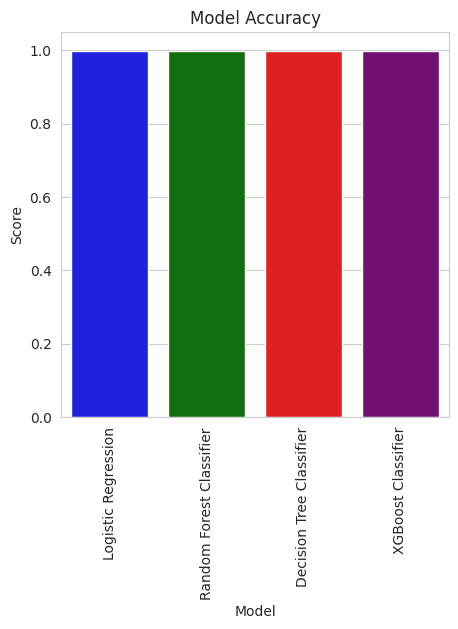

In [91]:
colors = ["blue", "green", "red", "purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.show()


## We can see Random Forest Classifier is the best model

# Generating Predictions on Test data using RandomForestClassifier

In [106]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(226980, 30)
(56746, 30)
(283726, 30)
(283726,)


In [107]:
# Final model (RandomForest Classifier) based on Evaluation from model_performance dataframe
model = RandomForestClassifier(random_state=0)
model.fit(x,y)

RandomForestClassifier(random_state=0)

In [108]:
# Generating Prediction on test data
ypred = model.predict(x_test)
print(ypred)

[0 0 0 ... 0 0 0]


# Save the Model

In [109]:
import pickle

pickle.dump(model, open('rf.pkl', 'wb'))   # wb = write binary

# Load the Model

In [110]:
loaded_model = pickle.load(open('rf.pkl', 'rb'))  # rb = read binary
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

# Creating a Random Dataset and Applying the saved model to predict the target column for the new df

In [111]:
random = fraud_df.sample(20)
random_df = random.drop('Class',axis=1)
random_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
53935,46220.0,-0.401105,0.931895,1.614816,0.953467,0.255254,-0.021979,0.554057,0.130398,-1.023267,-0.076311,1.707151,0.889480,0.173262,0.530312,0.740242,-0.531247,0.018625,-0.081266,0.696859,0.073359,0.048694,0.138873,0.010492,0.202464,-0.460415,-0.482392,0.175107,0.144549,14.72
59430,48838.0,0.054191,0.621771,1.644913,3.074037,0.204591,2.458313,-0.540556,-0.134058,-0.795472,0.434626,0.184454,0.204555,-0.462429,0.224346,1.429633,-1.552462,1.659753,-2.359616,-0.596487,-0.121300,0.556916,-0.679312,0.046419,-0.986466,0.876210,0.354559,0.117877,0.073684,43.95
7584,10478.0,-0.593098,-0.345637,0.061962,-1.389827,-0.177733,-0.717127,1.220135,-0.339048,-0.527261,0.053571,1.689634,-1.901453,2.620879,1.675320,-1.663287,-1.196234,0.083397,1.635372,-1.125390,0.155742,-0.228783,-0.286908,0.639141,-0.031291,-0.882086,0.697304,0.259937,0.275958,233.75
169369,119664.0,1.798318,-0.460056,-2.083657,0.280579,0.285568,-0.299204,-0.044049,0.089264,1.066873,-0.731383,0.600823,-0.245108,-2.151851,-1.001268,-0.463291,0.410060,0.952871,0.911761,0.456977,-0.046862,-0.186621,-0.675943,0.097019,0.112315,-0.146260,-0.117755,-0.044310,-0.011424,116.26
83210,59733.0,-0.578959,1.251851,1.178465,0.015519,-0.039786,-1.021963,0.654406,-0.035006,-0.128899,-0.186147,-0.274777,-0.325219,-0.361015,-0.404243,0.963299,0.385982,0.025343,-0.095255,-0.114930,0.204422,-0.301779,-0.752437,-0.005479,0.312567,-0.126065,0.078697,0.352964,0.155747,3.56
110484,71843.0,1.197602,0.174495,0.319188,1.416099,0.469899,1.226748,-0.257123,0.273378,-0.482959,0.491296,0.103707,1.073369,1.154393,-0.241881,-1.024262,0.581128,-0.652327,-0.542444,0.147355,-0.021666,-0.321671,-0.777068,-0.039418,-1.291541,0.287509,0.844726,-0.044806,-0.012216,9.11
159716,112843.0,0.008357,0.715494,0.149180,-0.773518,0.556904,-0.545617,0.833509,0.041600,-0.134309,-0.224294,0.359392,0.209147,-1.012424,0.492726,-0.923222,0.187732,-0.665983,-0.111553,0.263286,-0.078402,-0.233684,-0.577310,0.044305,-0.430058,-0.522580,0.149530,0.238272,0.081501,6.99
221393,142553.0,1.727865,-1.252653,-0.343915,0.505242,-1.116273,0.299299,-1.016057,0.268793,-0.242982,1.167625,0.468709,-0.231862,-1.236110,0.455084,0.569834,-0.531096,-0.775668,2.226614,-1.334069,-0.414444,-0.235801,-0.634721,0.332566,0.555798,-0.646478,-0.909476,0.043022,0.002763,156.35
40128,40107.0,1.377779,-1.002993,-0.628975,-1.786356,0.996161,3.540879,-1.563949,0.922995,-0.546498,0.653459,-0.076521,-0.759906,0.360524,-0.319203,1.295668,1.804590,-0.447960,-0.414280,0.586077,0.275392,0.345605,0.745319,-0.162846,1.050614,0.579699,-0.037236,0.035357,0.023993,39.00
259161,158990.0,0.776148,0.585031,-0.716941,-0.360733,0.574462,-0.349398,0.151706,-0.800480,-0.041904,-0.677864,1.182002,0.567235,-0.700288,-0.503022,-0.710278,0.596026,0.278077,0.081001,-0.275734,-0.328518,0.427835,-1.264508,0.111451,0.586414,0.490681,0.195993,-0.000076,0.086993,1.29


In [112]:
random_df.shape

(20, 30)

In [113]:
random_df.to_csv('sample_df')

In [114]:
sample_df = pd.read_csv('sample_df')
sample_df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,53935,46220.0,-0.401105,0.931895,1.614816,0.953467,0.255254,-0.021979,0.554057,0.130398,-1.023267,-0.076311,1.707151,0.889480,0.173262,0.530312,0.740242,-0.531247,0.018625,-0.081266,0.696859,0.073359,0.048694,0.138873,0.010492,0.202464,-0.460415,-0.482392,0.175107,0.144549,14.72
1,59430,48838.0,0.054191,0.621771,1.644913,3.074037,0.204591,2.458313,-0.540556,-0.134058,-0.795472,0.434626,0.184454,0.204555,-0.462429,0.224346,1.429633,-1.552462,1.659753,-2.359616,-0.596487,-0.121300,0.556916,-0.679312,0.046419,-0.986466,0.876210,0.354559,0.117877,0.073684,43.95
2,7584,10478.0,-0.593098,-0.345637,0.061962,-1.389827,-0.177733,-0.717127,1.220135,-0.339048,-0.527261,0.053571,1.689634,-1.901453,2.620879,1.675320,-1.663287,-1.196234,0.083397,1.635372,-1.125390,0.155742,-0.228783,-0.286908,0.639141,-0.031291,-0.882086,0.697304,0.259937,0.275958,233.75
3,169369,119664.0,1.798318,-0.460056,-2.083657,0.280579,0.285568,-0.299204,-0.044049,0.089264,1.066873,-0.731383,0.600823,-0.245108,-2.151851,-1.001268,-0.463291,0.410060,0.952871,0.911761,0.456977,-0.046862,-0.186621,-0.675943,0.097019,0.112315,-0.146260,-0.117755,-0.044310,-0.011424,116.26
4,83210,59733.0,-0.578959,1.251851,1.178465,0.015519,-0.039786,-1.021963,0.654406,-0.035006,-0.128899,-0.186147,-0.274777,-0.325219,-0.361015,-0.404243,0.963299,0.385982,0.025343,-0.095255,-0.114930,0.204422,-0.301779,-0.752437,-0.005479,0.312567,-0.126065,0.078697,0.352964,0.155747,3.56
5,110484,71843.0,1.197602,0.174495,0.319188,1.416099,0.469899,1.226748,-0.257123,0.273378,-0.482959,0.491296,0.103707,1.073369,1.154393,-0.241881,-1.024262,0.581128,-0.652327,-0.542444,0.147355,-0.021666,-0.321671,-0.777068,-0.039418,-1.291541,0.287509,0.844726,-0.044806,-0.012216,9.11
6,159716,112843.0,0.008357,0.715494,0.149180,-0.773518,0.556904,-0.545617,0.833509,0.041600,-0.134309,-0.224294,0.359392,0.209147,-1.012424,0.492726,-0.923222,0.187732,-0.665983,-0.111553,0.263286,-0.078402,-0.233684,-0.577310,0.044305,-0.430058,-0.522580,0.149530,0.238272,0.081501,6.99
7,221393,142553.0,1.727865,-1.252653,-0.343915,0.505242,-1.116273,0.299299,-1.016057,0.268793,-0.242982,1.167625,0.468709,-0.231862,-1.236110,0.455084,0.569834,-0.531096,-0.775668,2.226614,-1.334069,-0.414444,-0.235801,-0.634721,0.332566,0.555798,-0.646478,-0.909476,0.043022,0.002763,156.35
8,40128,40107.0,1.377779,-1.002993,-0.628975,-1.786356,0.996161,3.540879,-1.563949,0.922995,-0.546498,0.653459,-0.076521,-0.759906,0.360524,-0.319203,1.295668,1.804590,-0.447960,-0.414280,0.586077,0.275392,0.345605,0.745319,-0.162846,1.050614,0.579699,-0.037236,0.035357,0.023993,39.00
9,259161,158990.0,0.776148,0.585031,-0.716941,-0.360733,0.574462,-0.349398,0.151706,-0.800480,-0.041904,-0.677864,1.182002,0.567235,-0.700288,-0.503022,-0.710278,0.596026,0.278077,0.081001,-0.275734,-0.328518,0.427835,-1.264508,0.111451,0.586414,0.490681,0.195993,-0.000076,0.086993,1.29


In [115]:
sample_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,53935,46220.0,-0.401105,0.931895,1.614816,0.953467,0.255254,-0.021979,0.554057,0.130398,-1.023267,-0.076311,1.707151,0.889480,0.173262,0.530312,0.740242,-0.531247,0.018625,-0.081266,0.696859,0.073359,0.048694,0.138873,0.010492,0.202464,-0.460415,-0.482392,0.175107,0.144549,14.72
1,59430,48838.0,0.054191,0.621771,1.644913,3.074037,0.204591,2.458313,-0.540556,-0.134058,-0.795472,0.434626,0.184454,0.204555,-0.462429,0.224346,1.429633,-1.552462,1.659753,-2.359616,-0.596487,-0.121300,0.556916,-0.679312,0.046419,-0.986466,0.876210,0.354559,0.117877,0.073684,43.95
2,7584,10478.0,-0.593098,-0.345637,0.061962,-1.389827,-0.177733,-0.717127,1.220135,-0.339048,-0.527261,0.053571,1.689634,-1.901453,2.620879,1.675320,-1.663287,-1.196234,0.083397,1.635372,-1.125390,0.155742,-0.228783,-0.286908,0.639141,-0.031291,-0.882086,0.697304,0.259937,0.275958,233.75
3,169369,119664.0,1.798318,-0.460056,-2.083657,0.280579,0.285568,-0.299204,-0.044049,0.089264,1.066873,-0.731383,0.600823,-0.245108,-2.151851,-1.001268,-0.463291,0.410060,0.952871,0.911761,0.456977,-0.046862,-0.186621,-0.675943,0.097019,0.112315,-0.146260,-0.117755,-0.044310,-0.011424,116.26
4,83210,59733.0,-0.578959,1.251851,1.178465,0.015519,-0.039786,-1.021963,0.654406,-0.035006,-0.128899,-0.186147,-0.274777,-0.325219,-0.361015,-0.404243,0.963299,0.385982,0.025343,-0.095255,-0.114930,0.204422,-0.301779,-0.752437,-0.005479,0.312567,-0.126065,0.078697,0.352964,0.155747,3.56


In [116]:
sample_df.shape

(20, 31)

In [117]:
sample_df= sample_df.drop("Unnamed: 0", axis=1)
sample_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [118]:
# making prediction on random data
predicted_data = loaded_model.predict(sample_df)
print(predicted_data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [119]:
#  Compare the actual data and predicted data
new_data_with_predictions = random.copy()
new_data_with_predictions["predicted_Class"] = predicted_data

# Print the actual and predicted data
print("Actual Data and Predicted Data:")
print(new_data_with_predictions[["Class", "predicted_Class"]])

Actual Data and Predicted Data:
        Class  predicted_Class
53935       0                0
59430       0                0
7584        0                0
169369      0                0
83210       0                0
110484      0                0
159716      0                0
221393      0                0
40128       0                0
259161      0                0
268718      0                0
215200      0                0
131456      0                0
144814      0                0
243993      0                0
274386      0                0
219504      0                0
179350      0                0
279749      0                0
55201       0                0
